# Check the Candidates of Comparisons
Draw the light curves(LCs) of all candidates that meet your criteria.

Read the parameters from **tape.par**

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from photlib import read_params, prnlog

# READ the parameter file
par = read_params()

# PARAMETERS for the list of time-series observation
WORKDIR = par['WORKDIR']
LOGFILE = par['LOGFILE']
PHOT_APER = np.array(par['PHOTAPER'].split(','), float)   # Radius of aperture 
N_APER = len(PHOT_APER)
T_APER = int(par['APERUSED'])
TNUM1 = int(par['TARGETNUM']) # the number of target in the finding-chart
TNUM = TNUM1 - 1 # the index of target in the star list
TNAME = par['TARGETNAM']
WNAME = par['OBSDATE']+'-'+par['TARGETNAM']
CHKSIG, CHKDELM = float(par['CHKSIG']), float(par['CHKDELM'])

prnlog('#WORK: chek_comps')
prnlog(f'#WORKNAME: {WNAME}')
prnlog(f'#APERTURE: [{T_APER}] R={PHOT_APER[T_APER-1]}pix')
prnlog(f'#TARGETNUM: {TNUM1}')
prnlog(f'#LOGFILE: {LOGFILE}')

# MOVE to the working directory =======
CDIR = os.path.abspath(os.path.curdir)
os.chdir(WORKDIR)
#======================================

c:\Users\kang\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#WORK: chek_comps
#WORKNAME: 180326-HAT-P-12b
#APERTURE: [2] R=20.0pix
#TARGETNUM: 13
#LOGFILE: wobs.log


Read the observation log and determine the reference time in Heliocentric Julian Day(HJD).

In [7]:
# READ the time-series log file 
flog = open(LOGFILE,'r')
lfrm, lname, lJD, lX, lFILTER = [], [], [], [], []
for line in flog:
    tmp = line.split()
    lfrm.append(int(tmp[0]))
    lname.append(tmp[1])
    lJD.append(float(tmp[2]))
    lX.append(float(tmp[4]))
    lFILTER.append(tmp[5])
FRM, FLIST, JD, X = np.array(lfrm), np.array(lname), np.array(lJD), np.array(lX)
flog.close()
JD0 = int(JD[0])

Plot the airmass by time. 

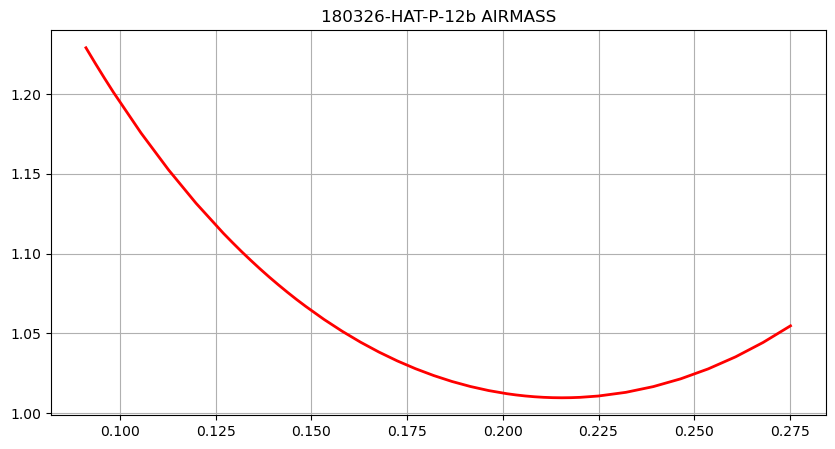

In [3]:
# PLOT the airmass variation 
fig1, ax1 = plt.subplots(num=1, figsize=(10,5))
ax1.plot(JD-JD0, X,'r-',lw=2)
ax1.grid()
ax1.set_title(f'{WNAME} AIRMASS')
fig1.savefig(f'w{WNAME}-AIRMASS.png')

Find the number of stars, the number of frames, and filter.

In [4]:
# CHECK number of frames and stars 
tmp = np.genfromtxt(FLIST[0]+'.apx') 
NSTARS = len(tmp[:,0])
NFRMS = len(FLIST)
FILTER = lFILTER[0]

Read the time-series table(.apx) and save to the list.

In [5]:
# READ the apt files
FLX, ERR, MAG, MRR, FLG = [], [], [], [], []
for i, fidx in enumerate(FLIST):
    dat = np.genfromtxt(fidx+'.apx')
    FLX.append(dat[:,(T_APER+2)])
    ERR.append(dat[:,(N_APER+T_APER+2)])
    MAG.append(dat[:,(2*N_APER+T_APER+2)])
    MRR.append(dat[:,(3*N_APER+T_APER+2)])
    FLG.append(dat[:,(4*N_APER+4)])
# MAKE the arrays of photometric results by JDs and stars
# row: frames(time), col: stars(mag, flux) 
FLX, ERR = np.array(FLX), np.array(ERR)
MAG, MRR = np.array(MAG), np.array(MRR)
FLG = np.array(FLG)

Plot the LCs for all candidates by the criteria in **tape.par**. You can adjust these parameters. 

- CHKSIG    0.4          # (TIMESERIES) STD checking criteria for LC test
  > standard deviation of light curve less than 0.4
- CHKDELM   3            # (TIMESERIES) DEL_MAG checking criteria for LC test
  > difference of magnitude between the target and the candidate less than 3 

013-001: [OK] dM=-0.077 RMS=0.011
013-002: [FAIL] DELM = -4.60
013-003: [FAIL] DELM = -4.56
013-004: [FAIL] DELM = -4.67
013-005: [OK] dM=-1.446 RMS=0.012
013-006: [FAIL] DELM = -3.89
013-007: [FAIL] DELM = -4.58
013-008: [FAIL] DELM = -3.04
013-009: [OK] dM=-1.650 RMS=0.012
013-010: [OK] dM=-0.488 RMS=0.011
013-011: [FAIL] DELM = -3.59
013-012: [FAIL] DELM = -3.88
013-014: [FAIL] DELM = -3.17
013-015: [OK] dM=-2.824 RMS=0.014
013-016: [FAIL] DELM = -4.93
013-017: [OK] dM=-0.588 RMS=0.011
013-018: [FAIL] DELM = -4.86
013-019: [FAIL] DELM = -4.71
013-020: [FAIL] DELM = -3.62
013-021: [OK] dM=-0.464 RMS=0.010
013-022: [OK] dM=-2.951 RMS=0.013


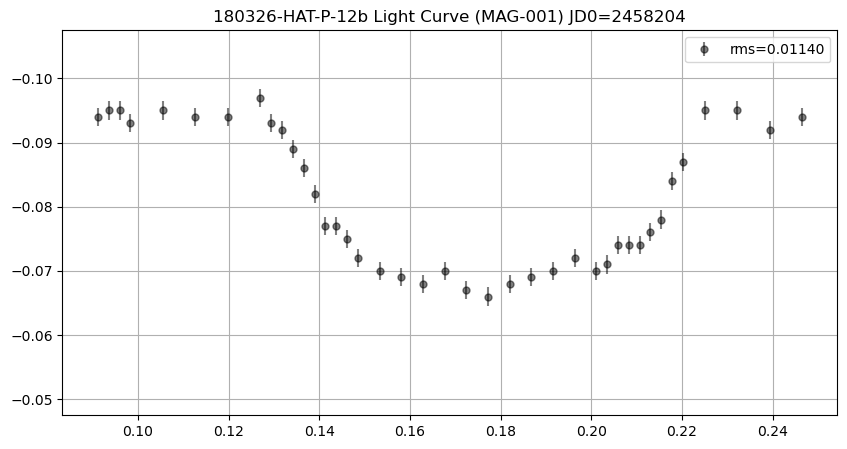

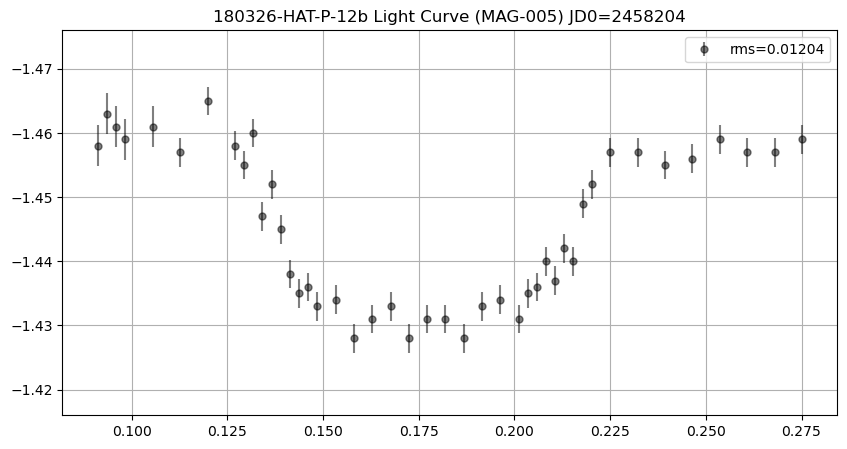

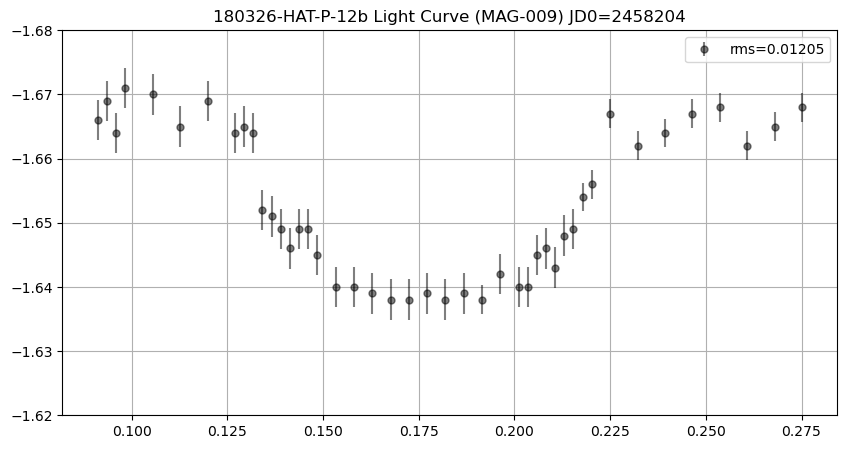

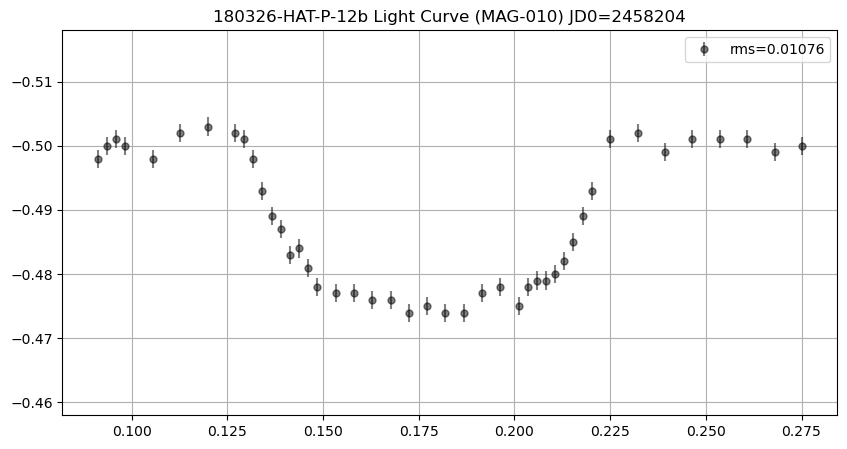

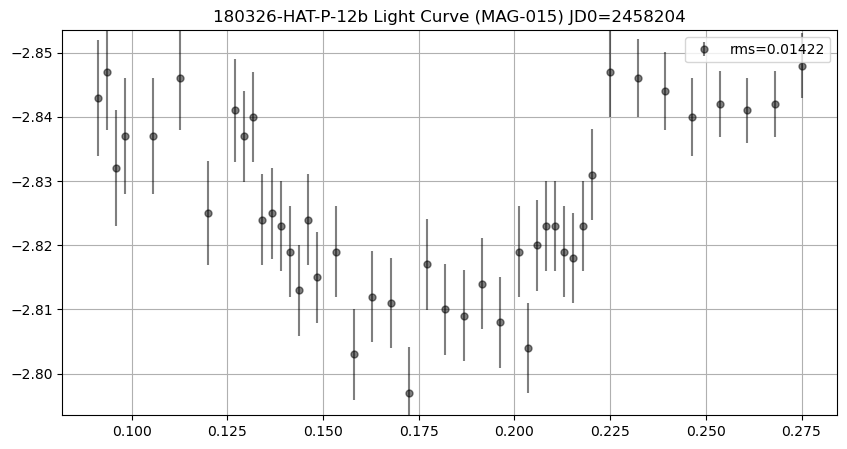

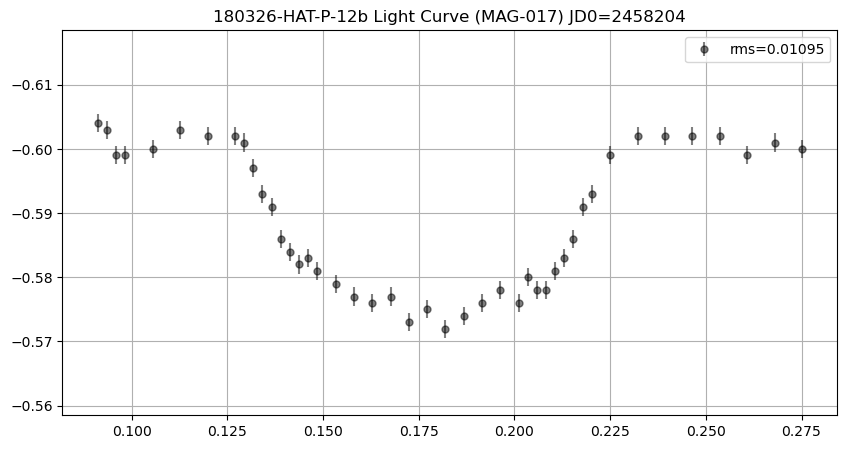

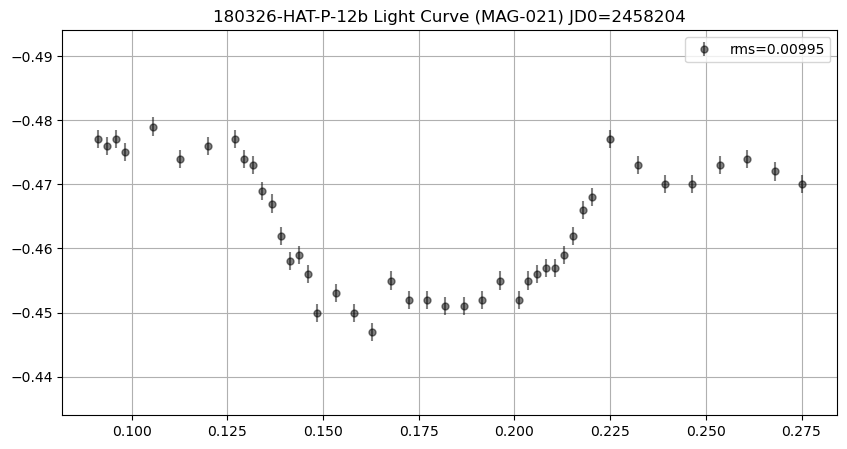

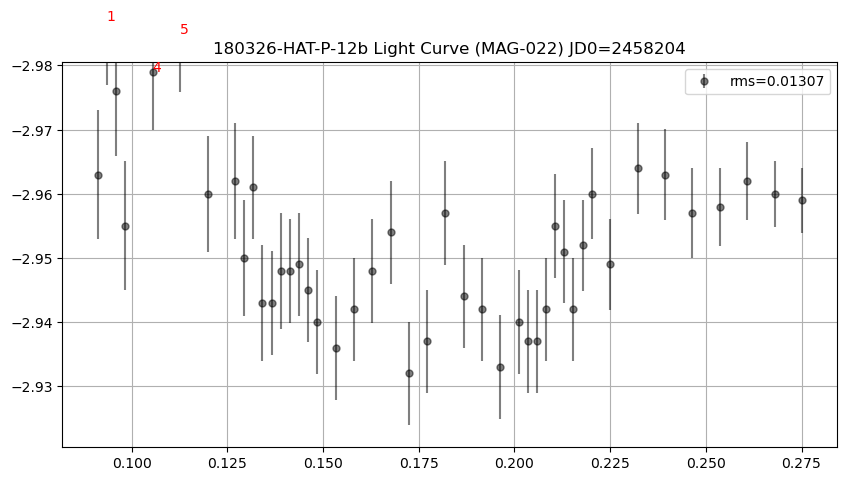

In [11]:
# TARGET arrays
TFLX, TERR, TMAG, TMRR, TFLG = \
  FLX[:,TNUM], ERR[:,TNUM], MAG[:,TNUM], MRR[:,TNUM], FLG[:,TNUM]
NFRMS = len(FLX)
# LOOP for the comparisons
for j in range(1,len(FLX[0,:])+1): 

    # CHECK the index of comparisons
    cidx = j - 1
    if cidx == TNUM: continue

    x, y = JD-JD0, TMAG - MAG[:,cidx]
    yflg = TFLG + FLG[:,cidx]
    yerr = np.sqrt(TMRR**2 + MRR[:,cidx]**2)
    vv, = np.where(yflg == 0)
    VFRMS = len(vv)
    if VFRMS < NFRMS*0.5: 
        prnlog(f'{TNUM1:03d}-{j:03d}: [FAIL] need more points, {VFRMS:d} pts')
        continue

    # CALC. the statistics for the shift values
    ymed = np.median(y[vv])
    rms = np.sqrt(np.mean((ymed-y[vv])**2))
    ysig = np.std(y[vv])

    # CHECK the criteria for the comparisons
    if ysig > CHKSIG: 
        prnlog(f'{TNUM1:03d}-{j:03d}: [FAIL] SIG = {ysig:.2f}')
        continue 
    if ymed < -CHKDELM: 
        prnlog(f'{TNUM1:03d}-{j:03d}: [FAIL] DELM = {ymed:.2f}')
        continue

    prnlog(f'{TNUM1:03d}-{j:03d}: [OK] dM={ymed:.3f} RMS={rms:.3f}')

    # PLOT the light curves of magnitude for each star  
    fig1, ax1 = plt.subplots(figsize=(10,5))
    ax1.errorbar(x[vv],y[vv],yerr=yerr[vv], fmt='ko', ms=5, alpha=0.5, label=f'rms={rms:.5f}')
    cc, = np.where((ymed - y[vv])**2 > 4*ysig**2)
    for ix, iy, ifrm in zip(x[vv[cc]],y[vv[cc]],FRM[vv[cc]]):
        ax1.text(ix,iy,'%d' % (ifrm,),color='r',fontsize=10)
    ax1.set_ylim(ymed+0.03,ymed-0.03)
    ax1.set_title(f'{WNAME} Light Curve (MAG-{j:03d}) JD0={JD0:d}')
    ax1.grid()
    ax1.legend()
    fig1.savefig(f'w{WNAME}-{FILTER}-CHK-{j:03d}.png')
    



Return to the directory

In [ ]:
# RETURN to the directory ===========
os.chdir(CDIR) 
#====================================

Select the comparison and write the number of comparison to the parameter file **tape.par**.

> COMPNUMS  10,17,21     # (TIMESERIES) (CSV) comparison star numbers